In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report, accuracy_score

## Importing Data and Preprocessing EDA

In [2]:
df = pd.read_csv(r"C:\Users\mobin\DATASIENCE\ML Assignments\STATISTICS\Decision Trees\Fraud_check.csv")

In [3]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB


In [5]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [6]:
def taxable_income(x):
    if x <= 30000:
        return 'RISKY'
    else:
        return 'GOOD'
df['FRAUD'] = df['Taxable.Income'].apply(taxable_income)

In [7]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,FRAUD
0,NO,Single,68833,50047,10,YES,GOOD
1,YES,Divorced,33700,134075,18,YES,GOOD
2,NO,Married,36925,160205,30,YES,GOOD
3,YES,Single,50190,193264,15,YES,GOOD
4,NO,Married,81002,27533,28,NO,GOOD


In [8]:
df['FRAUD'].value_counts()

FRAUD
GOOD     476
RISKY    124
Name: count, dtype: int64

In [9]:
data = df.copy()
data = pd.get_dummies(data.iloc[:,0:6])

In [10]:
data

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,68833,50047,10,True,False,False,False,True,False,True
1,33700,134075,18,False,True,True,False,False,False,True
2,36925,160205,30,True,False,False,True,False,False,True
3,50190,193264,15,False,True,False,False,True,False,True
4,81002,27533,28,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,False,True,True,False,False,False,True
596,69967,55369,2,False,True,True,False,False,False,True
597,47334,154058,0,True,False,True,False,False,False,True
598,98592,180083,17,False,True,False,True,False,True,False


In [11]:
data['FRAUD'] = df.FRAUD

In [12]:
data

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,FRAUD
0,68833,50047,10,True,False,False,False,True,False,True,GOOD
1,33700,134075,18,False,True,True,False,False,False,True,GOOD
2,36925,160205,30,True,False,False,True,False,False,True,GOOD
3,50190,193264,15,False,True,False,False,True,False,True,GOOD
4,81002,27533,28,True,False,False,True,False,True,False,GOOD
...,...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,False,True,True,False,False,False,True,GOOD
596,69967,55369,2,False,True,True,False,False,False,True,GOOD
597,47334,154058,0,True,False,True,False,False,False,True,GOOD
598,98592,180083,17,False,True,False,True,False,True,False,GOOD


In [15]:
data.dtypes

Taxable.Income              int64
City.Population             int64
Work.Experience             int64
Undergrad_NO                 bool
Undergrad_YES                bool
Marital.Status_Divorced     int32
Marital.Status_Married       bool
Marital.Status_Single        bool
Urban_NO                     bool
Urban_YES                    bool
FRAUD                      object
dtype: object

In [17]:

# Changing data columns from bool to integer

for col_name in data.columns[0:10]:
    if data[col_name].dtype == 'bool':
        data[col_name] = data[col_name].astype(int)

In [18]:
data.dtypes

Taxable.Income              int64
City.Population             int64
Work.Experience             int64
Undergrad_NO                int32
Undergrad_YES               int32
Marital.Status_Divorced     int32
Marital.Status_Married      int32
Marital.Status_Single       int32
Urban_NO                    int32
Urban_YES                   int32
FRAUD                      object
dtype: object

In [19]:
data.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,FRAUD
0,68833,50047,10,1,0,0,0,1,0,1,GOOD
1,33700,134075,18,0,1,1,0,0,0,1,GOOD
2,36925,160205,30,1,0,0,1,0,0,1,GOOD
3,50190,193264,15,0,1,0,0,1,0,1,GOOD
4,81002,27533,28,1,0,0,1,0,1,0,GOOD


In [20]:
# Changing Target variable by using labelencoding

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['FRAUD'] = encoder.fit_transform(data['FRAUD'])

In [21]:
data

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,FRAUD
0,68833,50047,10,1,0,0,0,1,0,1,0
1,33700,134075,18,0,1,1,0,0,0,1,0
2,36925,160205,30,1,0,0,1,0,0,1,0
3,50190,193264,15,0,1,0,0,1,0,1,0
4,81002,27533,28,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1,0
596,69967,55369,2,0,1,1,0,0,0,1,0
597,47334,154058,0,1,0,1,0,0,0,1,0
598,98592,180083,17,0,1,0,1,0,1,0,0


In [22]:
data.FRAUD.value_counts()

FRAUD
0    476
1    124
Name: count, dtype: int64

In [24]:
# SPliting the data into train_test_split part. 

X = data.drop('FRAUD' , axis = 1)
Y = data['FRAUD']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2 , random_state=15)



## CREATING MODEL

In [25]:
model = DecisionTreeClassifier(max_depth=None , criterion='entropy')
model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy')

In [26]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

[Text(0.5, 0.75, 'x[0] <= 30219.5\nentropy = 0.754\nsamples = 480\nvalue = [376, 104]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 104\nvalue = [0, 104]'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 376\nvalue = [376, 0]')]

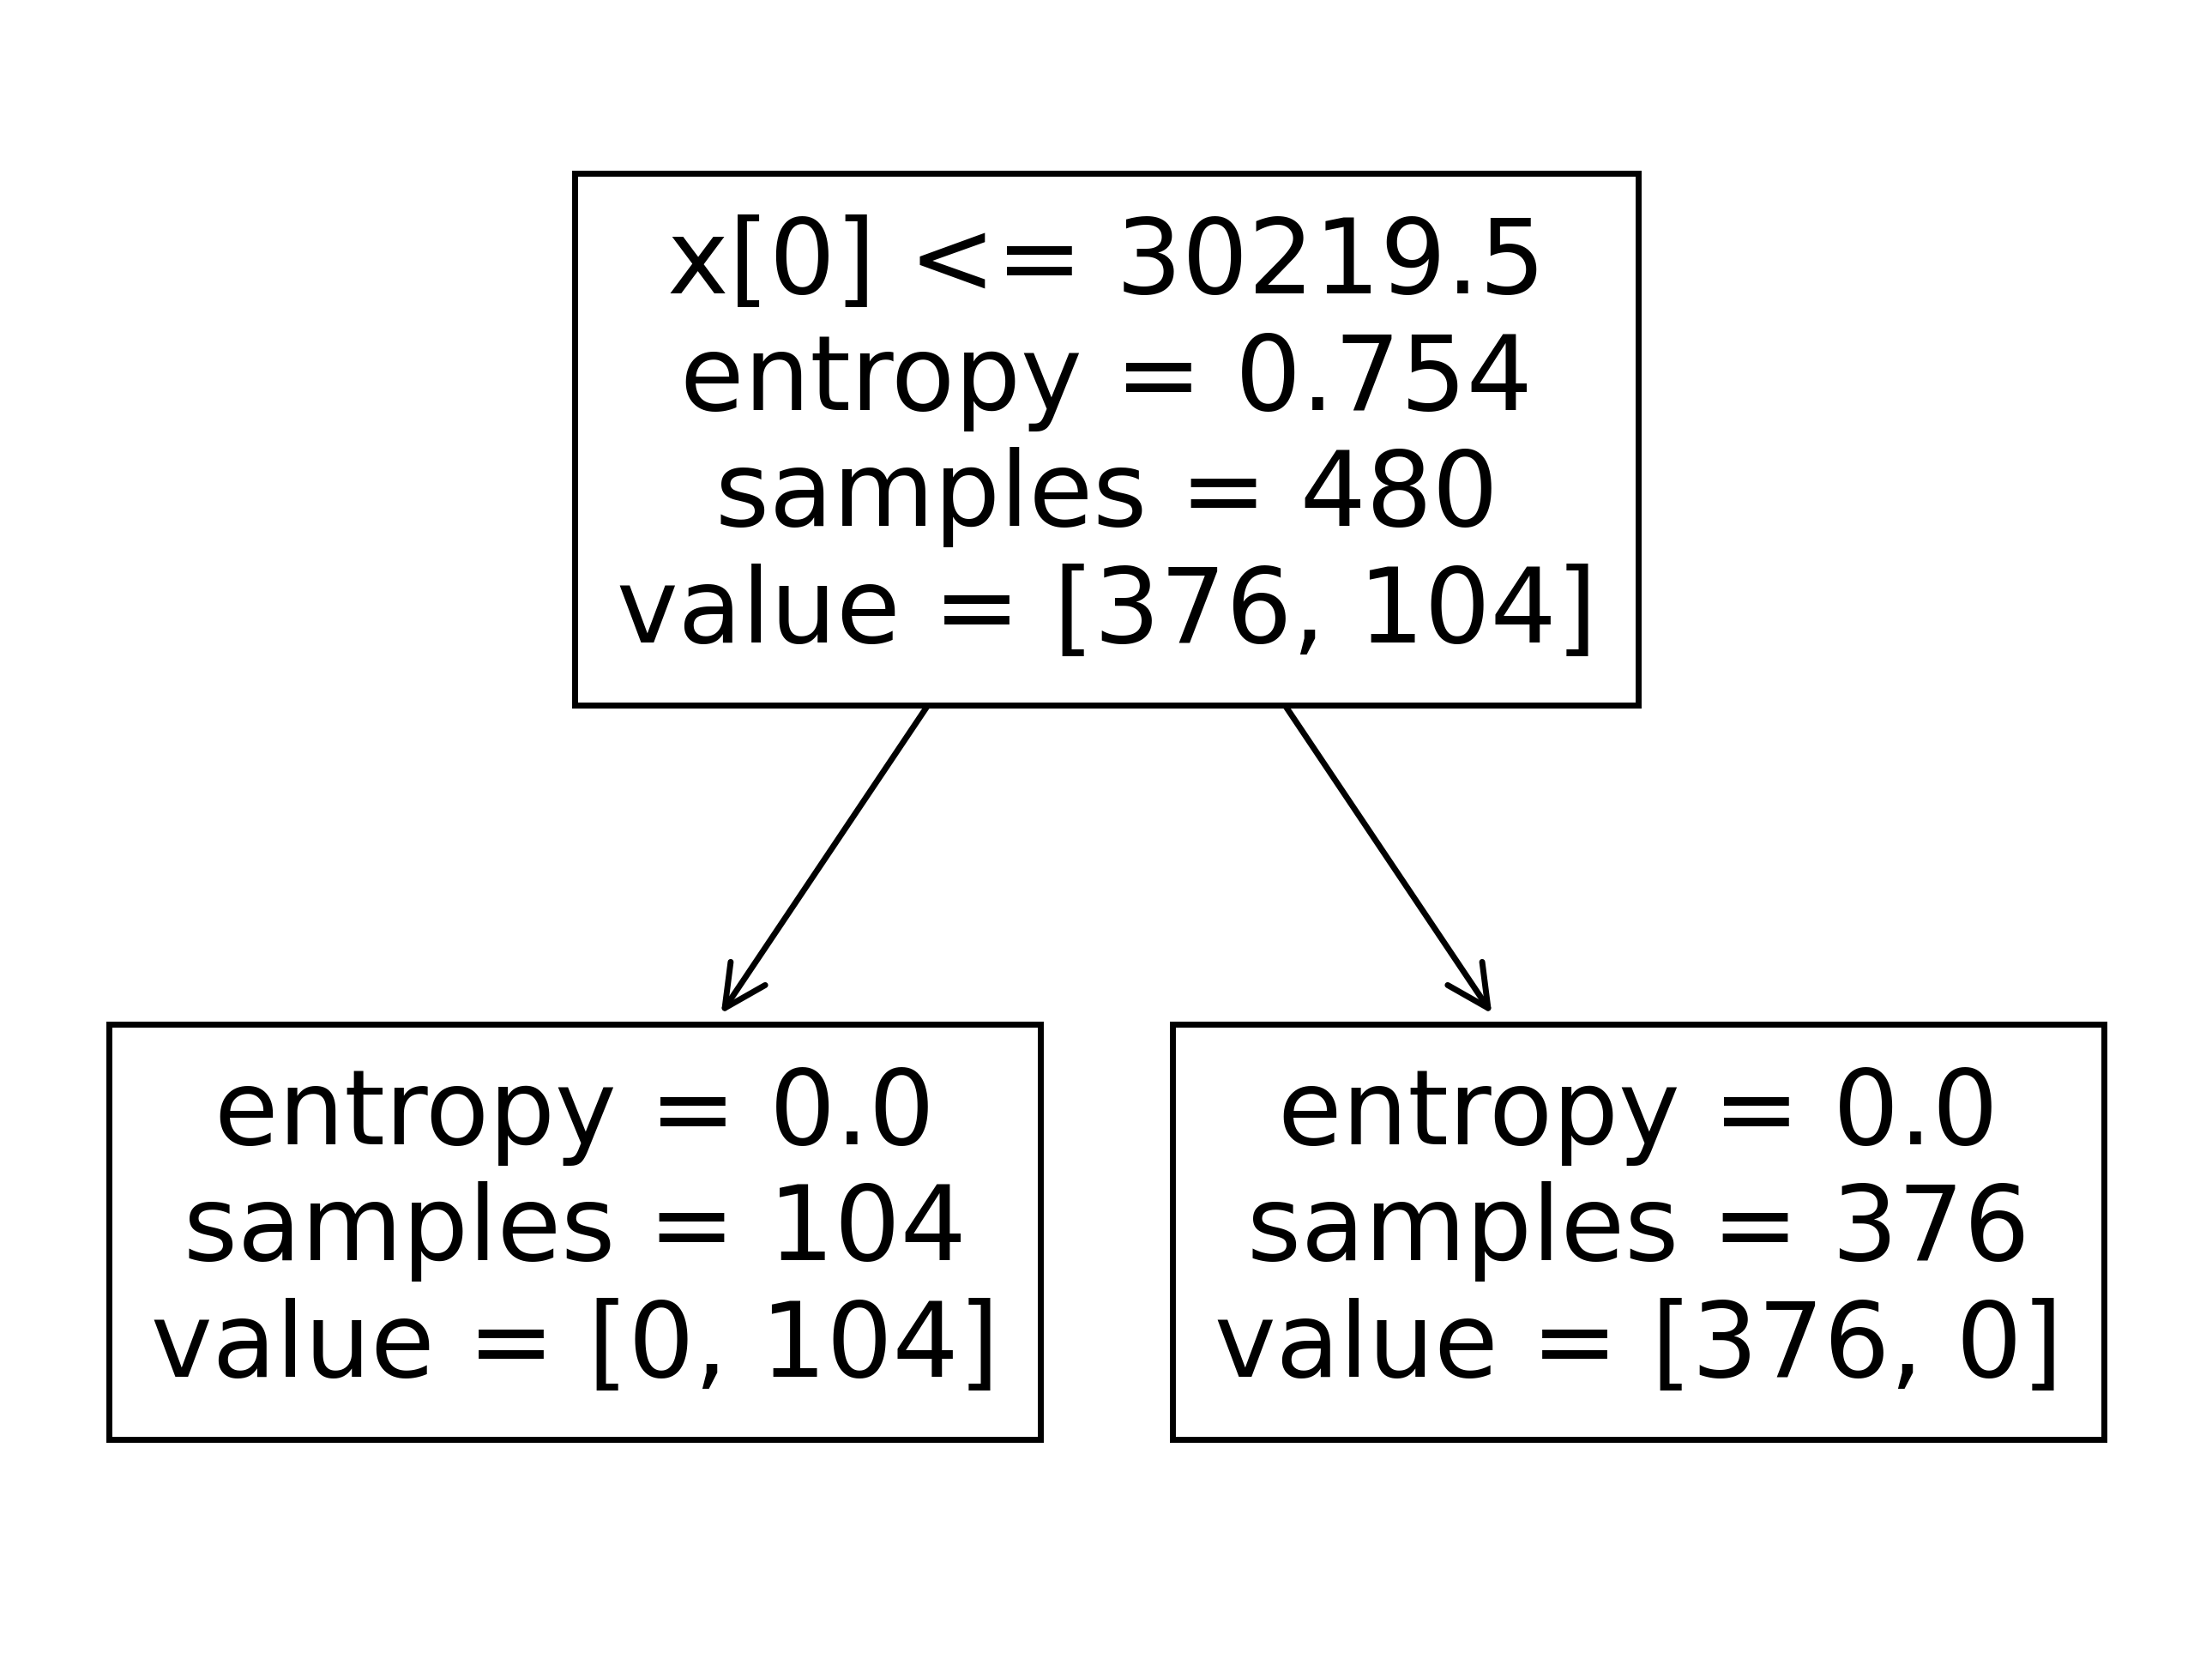

In [29]:
plt.figure(dpi = 500)
tree.plot_tree(model)

In [31]:
pd.crosstab(Y_test,y_pred)

col_0,0,1
FRAUD,,
0,99,1
1,0,20


In [32]:
model.score(X_test, Y_test)

0.9916666666666667